In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns # for visualiation
from scipy.stats import ttest_ind # t-tests
import altair as alt
alt.renderers.enable('notebook') # enable altair rendering
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
# load data
data = pd.read_csv('data/dengue_features_train.csv')
outcome = pd.read_csv('data/dengue_labels_train.csv')
total = data
total['total_cases'] = outcome['total_cases']

In [3]:
# fill in missing value
total.fillna(method = 'ffill', inplace = True)

# Making new variable
Change of max temperature from last week.

In [4]:
total['lag_max'] = total['station_max_temp_c'] - total['station_max_temp_c'].shift(1)
sj = total[total.city=='sj']
iq = total[total.city=='iq']



# Exploratory Data Analysis
Given the complexity of this dataset, performing a detailed exploratory data analysis is crucial for your ability to understand and communicate its features. Your report should include at least 5 exploratory visualizations that expose pertinent information about the dataset.
## What is the distribution of the number of cases of Dengue each week?

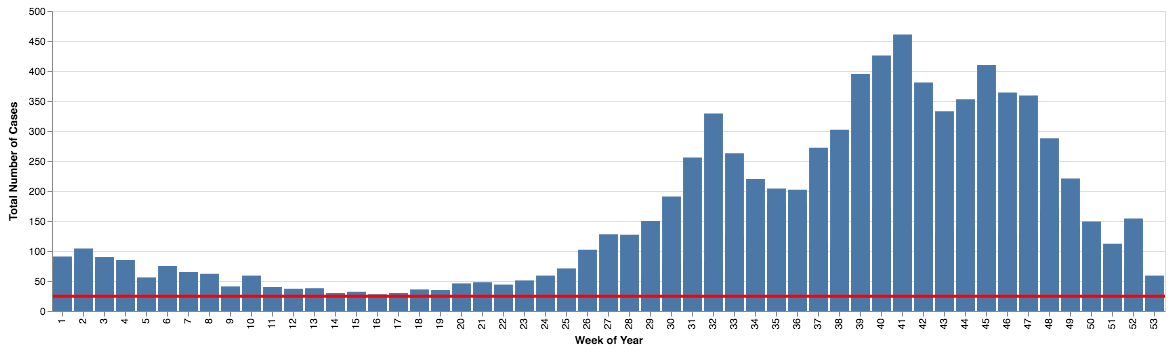

In [5]:
bar = alt.Chart(total).mark_bar().encode(
    x=alt.X('weekofyear:O', axis=alt.Axis(title='Week of Year')),
    y=alt.Y('total_cases:Q',axis=alt.Axis(title='Total Number of Cases'))
)

rule = alt.Chart(total).mark_rule(color='red').encode(
    y='mean(total_cases)',
    size=alt.value(3)
)

bar + rule

### Observation
Through week 25 to 47 of the years throughout the dataset, there is a sharp increase of cases. The mean of cases in shown in the red line. 

## How does the number of cases fluctuate over time? Do these temporal relationships persist in both locations?

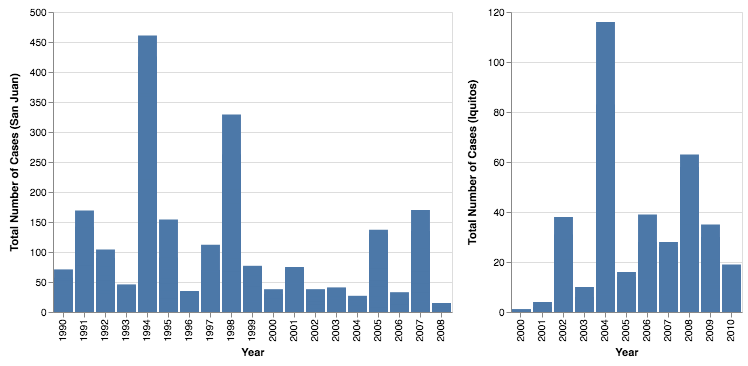

In [6]:
bar_iq = alt.Chart(iq).mark_bar().encode(
    x=alt.X('year:O', axis=alt.Axis(title='Year')),
    y=alt.Y('total_cases:Q',axis=alt.Axis(title='Total Number of Cases (Iquitos)'))
)
bar_sj = alt.Chart(sj).mark_bar().encode(
    x=alt.X('year:O', axis=alt.Axis(title='Year')),
    y=alt.Y('total_cases:Q',axis=alt.Axis(title='Total Number of Cases (San Juan)'))
)
bar_sj | bar_iq

### Observation
The way that the number of cases of Dengue fever varies is independent of the city we are looking at. Temporal relationships do not persist in both locations. We see that in Iquitos there was a spike in cases from 2003 to 2004 and 2005 to 2006, but there was a sharp decrease in cases in San Juan. 

## Let's Look at the variables

In [7]:
total.total_cases.describe()

count    1456.000000
mean       24.675137
std        43.596000
min         0.000000
25%         5.000000
50%        12.000000
75%        28.000000
max       461.000000
Name: total_cases, dtype: float64

In [8]:
total.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,lag_max
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1455.000000
mean,2001.031593,26.503434,0.131271,0.128068,0.202606,0.201987,45.686937,298.697965,299.221483,295.245445,...,45.686937,16.745565,4.898656,27.180313,8.085646,32.443338,22.099863,39.194162,24.675137,0.002955
std,5.408314,15.019437,0.138527,0.119561,0.074409,0.083592,43.779318,1.361950,1.262676,1.527527,...,43.779318,1.542276,3.542340,1.280861,2.122836,1.960769,1.569113,47.363305,43.596000,1.323062
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000,-8.000000
25%,1997.000000,13.750000,0.039100,0.048250,0.152795,0.144455,9.655000,297.654643,298.257143,294.119643,...,9.655000,15.560000,2.328571,26.300000,6.528571,31.100000,21.100000,8.700000,5.000000,-0.850000
50%,2002.000000,26.500000,0.113900,0.115926,0.195664,0.190121,38.235000,298.646429,299.285714,295.639286,...,38.235000,17.087143,2.857143,27.400000,7.364286,32.800000,22.200000,23.800000,12.000000,0.000000
75%,2005.000000,39.250000,0.232018,0.213429,0.247461,0.246775,70.227500,299.827500,300.207143,296.460000,...,70.227500,17.977500,7.617857,28.132143,9.600000,33.900000,23.300000,53.675000,28.000000,0.800000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000,8.700000


In [9]:
for column in sj:
    if not (column == 'city' or column == 'week_start_date'):
        if(sj[column].mean() < sj[column].var()):
            print(column)

weekofyear
precipitation_amt_mm
reanalysis_precip_amt_kg_per_m2
reanalysis_sat_precip_amt_mm
station_precip_mm
total_cases
lag_max


In [10]:
for column in iq:
    if not (column == 'city' or column == 'week_start_date'):
        if(iq[column].mean() < iq[column].var()):
            print(column)

weekofyear
precipitation_amt_mm
reanalysis_precip_amt_kg_per_m2
reanalysis_sat_precip_amt_mm
station_precip_mm
total_cases
lag_max


## Which variables are correlated with your outcome of interest (total_cases)? Are these correlations consistent in both cities (you may want to calculate this)?
Lets make bar charts(representing each city), and see which variables correlate to total_cases by looking at thier distribution.

Visualizations for the varaibles can be found on **vis.ipynb**. For a Negative Binomial Regression model, we want to pick variables that follow a *negative binomial distribution*. We see that depending on the city we are looking at, there are some varaibles that follow this curve. The variances within each variable have to be higher than the means within each varaible. These differences suggest that over-dispersion is present and that a Negative Binomial model would be appropriate.
List of variables that follow NB distribution for San Juan:
- station_precip_mm
- precipitation_amt_mm
- reanalysis_sat_precip_amt_mm
- lag_max
- reanalysis_precip_amt_kg_per_m2

List of variables that follow NB distribution for Iquitos:
- station_precip_mm
- lag_max
- reanalysis_precip_amt_kg_per_m2

In [11]:
#WE NEED TO GET RID OF multicollinearity COLUMNS
#Which ones?
#total = total.drop(columns = ['week_start_date', 'city'])
sj = sj.drop(columns = ['week_start_date', 'city'])
iq = iq.drop(columns = ['week_start_date', 'city'])

In [12]:
sj_model = smf.glm(formula='total_cases ~ station_precip_mm + precipitation_amt_mm + reanalysis_sat_precip_amt_mm + reanalysis_precip_amt_kg_per_m2', data=sj, family=sm.families.NegativeBinomial()).fit()
iq_model = smf.glm(formula='total_cases ~ station_precip_mm + reanalysis_precip_amt_kg_per_m2', data=iq, family=sm.families.NegativeBinomial()).fit()

In [13]:
print(sj_model.summary())
print(iq_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            total_cases   No. Observations:                  936
Model:                            GLM   Df Residuals:                      932
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4240.7
Date:                Tue, 13 Nov 2018   Deviance:                       1075.5
Time:                        03:25:54   Pearson chi2:                 2.00e+03
No. Iterations:                    79   Covariance Type:             nonrobust
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           3.3366      0.048     69.451      0.000       3.242  

In [18]:
sj['sj_predictions'] = sj_model.predict()
iq['iq_predictions'] = iq_model.predict()

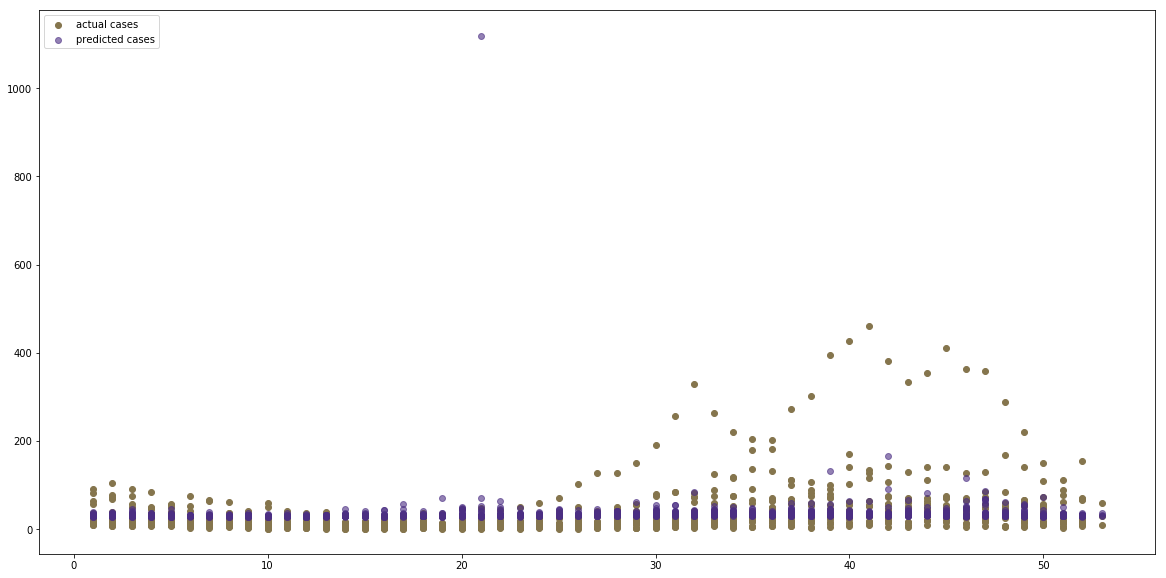

In [24]:
plt.figure(figsize=(20,10))
plt.scatter(x=sj['weekofyear'], y=sj['total_cases'], c="#85754d", label="actual cases")
plt.scatter(x=sj['weekofyear'], y=sj['sj_predictions'], c="#4b2e83", label="predicted cases", alpha = 0.6)
plt.legend(loc='upper left')

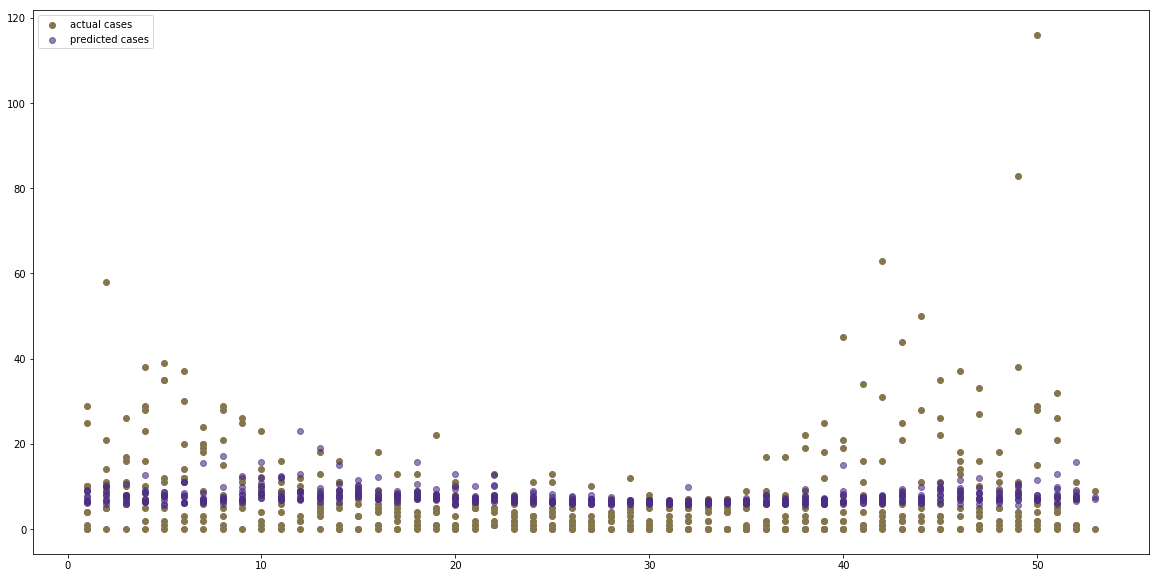

In [19]:
plt.figure(figsize=(20,10))
plt.scatter(x=iq['weekofyear'], y=iq['total_cases'], c="#85754d", label="actual cases")
plt.scatter(x=iq['weekofyear'], y=iq['iq_predictions'], c="#4b2e83", label="predicted cases", alpha = 0.6)
plt.legend(loc='upper left')

In [20]:
# load test data
test_data = pd.read_csv('data/dengue_features_test.csv')

test_sj = test_data[test_data.city == 'sj'].copy()


test_sj.fillna(method = 'ffill', inplace = True)

predictions_sj = sj_model.predict(test_sj).astype(int)


test_iq = test_data[test_data.city == 'iq'].copy()


test_iq.fillna(method = 'ffill', inplace = True)

predictions_iq = iq_model.predict(test_iq).astype(int)

result = pd.read_csv('data/submission_format.csv')

result.total_cases = np.concatenate([predictions_sj, predictions_iq])

result

#result.to_csv("data/predicted_result.csv")

,city,year,weekofyear,total_cases
0,sj,2008,18,31
1,sj,2008,19,31
2,sj,2008,20,28
3,sj,2008,21,28
4,sj,2008,22,27
5,sj,2008,23,32
6,sj,2008,24,28
7,sj,2008,25,29
8,sj,2008,26,30
9,sj,2008,27,30


KeyError: 'sj_predictions'

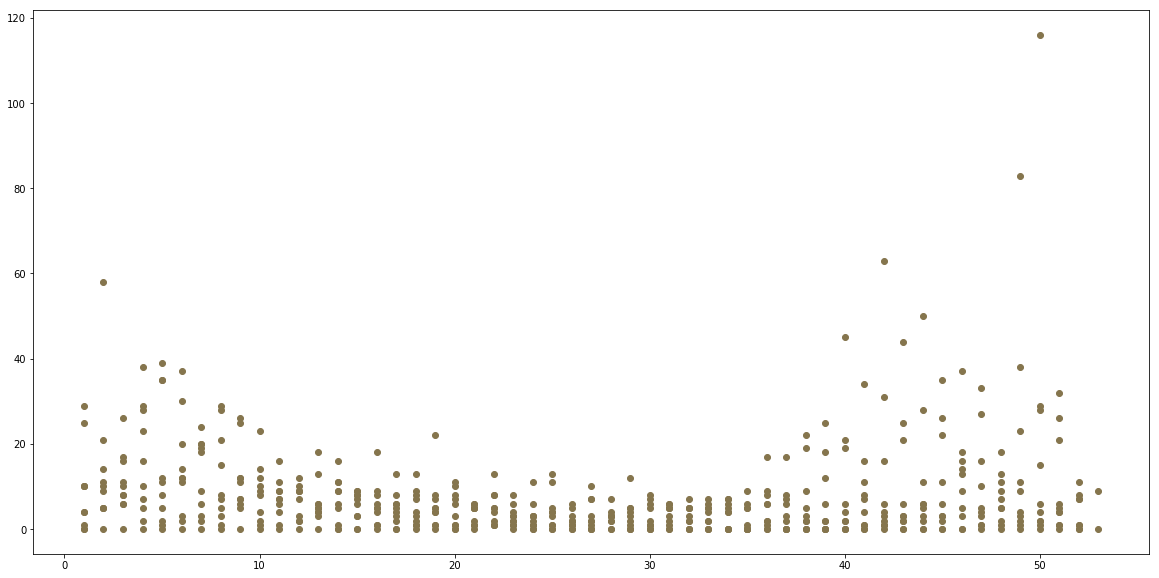